In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.client import device_lib
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [40]:
import requests

df = pd.read_csv("/content/drive/MyDrive/навчальне/data/netflix_titles.csv")

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [41]:
df = df.dropna()

In [42]:
df.shape

(5332, 12)

In [43]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [44]:
df = df.drop(["description", "duration", "listed_in", "cast", "date_added", "title", "director"], axis = 1)

In [45]:
df

,show_id,type,country,release_year,rating
7,s8,Movie,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA
8,s9,TV Show,United Kingdom,2021,TV-14
9,s10,Movie,United States,2021,PG-13
12,s13,Movie,"Germany, Czech Republic",2021,TV-MA
24,s25,Movie,India,1998,TV-14
...,...,...,...,...,...
8801,s8802,Movie,"United Arab Emirates, Jordan",2015,TV-MA
8802,s8803,Movie,United States,2007,R
8804,s8805,Movie,United States,2009,R
8805,s8806,Movie,United States,2006,PG


In [46]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['show_id'] = encoder.fit_transform(df['show_id'])
df['type'] = encoder.fit_transform(df['type'])
df['country'] = encoder.fit_transform(df['country'])
df['rating'] = encoder.fit_transform(df['rating'])

In [47]:
df

,show_id,type,country,release_year,rating
7,4632,0,536,1993,8
8,5264,1,409,2021,6
9,0,0,490,2021,4
12,176,0,167,2021,8
24,963,0,195,1998,6
...,...,...,...,...,...
8801,5250,0,403,2015,8
8802,5251,0,490,2007,5
8804,5252,0,490,2009,5
8805,5253,0,490,2006,3


In [48]:
print('country:', df['country'].nunique(), '\n')
print('release_year:', df['release_year'].nunique(), '\n')
print('rating:', df['rating'].nunique(), '\n')

country: 604 

release_year: 72 

rating: 14 



In [49]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [50]:
X = df.drop(["rating"], axis=1)
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [51]:
y_train.value_counts()

0.615385    1453
0.461538     966
0.384615     612
0.307692     378
0.692308     352
0.230769     225
0.538462      74
0.769231      65
0.846154      60
0.153846      42
0.000000      33
1.000000       3
0.923077       1
0.076923       1
Name: rating, dtype: int64

In [52]:
y_test.value_counts()

0.615385    369
0.461538    248
0.384615    166
0.307692     92
0.692308     79
0.230769     50
0.846154     16
0.153846     16
0.769231     11
0.538462     10
0.000000      7
0.923077      2
0.076923      1
Name: rating, dtype: int64

KERAS

In [53]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU

model = keras.Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='softmax'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.summary()
from keras.optimizers import Adam
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               640       
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 13189 (51.52 KB)
Trainable params: 13189 (51.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 8.7925e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
34/54 [=================>............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 4.5956e-04

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 8.7925e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 8.7925e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 8.7925e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 8.7925e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 8.7925e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 8.7925e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - los

In [55]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f'accuracy: {accuracy*100}%')

134/134 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 7.0340e-04
accuracy: 0.07033997680991888%


IMAGE

In [56]:

import matplotlib.pyplot as plt
import gdown
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import random
from matplotlib.image import imread
from PIL import Image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as image

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score , confusion_matrix


image_df =  pd.read_csv("/content/drive/MyDrive/навчальне/data/lab3/sports.csv")

In [57]:
image_df

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train
...,...,...,...,...
14488,99,valid/wingsuit flying/1.jpg,wingsuit flying,valid
14489,99,valid/wingsuit flying/2.jpg,wingsuit flying,valid
14490,99,valid/wingsuit flying/3.jpg,wingsuit flying,valid
14491,99,valid/wingsuit flying/4.jpg,wingsuit flying,valid


In [58]:
print(f"Total number of target classes : {len(image_df.labels.unique())}")

Total number of target classes : 100


In [59]:
labels_to_keep = ['boxing', 'football', 'hockey', 'formula 1 racing', 'judo']

image_df = image_df[image_df['labels'].isin(labels_to_keep)]

image_df

,class id,filepaths,labels,data set
1942,15,train/boxing/001.jpg,boxing,train
1943,15,train/boxing/002.jpg,boxing,train
1944,15,train/boxing/003.jpg,boxing,train
1945,15,train/boxing/004.jpg,boxing,train
1946,15,train/boxing/005.jpg,boxing,train
...,...,...,...,...
14253,52,valid/judo/1.jpg,judo,valid
14254,52,valid/judo/2.jpg,judo,valid
14255,52,valid/judo/3.jpg,judo,valid
14256,52,valid/judo/4.jpg,judo,valid


In [60]:
print(f"Total number of target classes : {len(image_df.labels.unique())}")

Total number of target classes : 5


In [61]:
dataset = {
             "train_data" : "/content/drive/MyDrive/навчальне/data/lab3/train",
             "valid_data" : "/content/drive/MyDrive/навчальне/data/lab3/valid",
             "test_data" : "/content/drive/MyDrive/навчальне/data/lab3/test"
          }

all_data = []
for path in dataset.values():
    data = {"imgpath": [] , "labels": [] }
    category = os.listdir(path)

    for folder in category:
        folderpath = os.path.join(path , folder)
        filelist = os.listdir(folderpath)
        for file in filelist:
            fpath = os.path.join(folderpath, file)
            data["imgpath"].append(fpath)
            data["labels"].append(folder)


    all_data.append(data.copy())
    data.clear()



train_df = pd.DataFrame(all_data[0] , index=range(len(all_data[0]['imgpath'])))
valid_df = pd.DataFrame(all_data[1] , index=range(len(all_data[1]['imgpath'])))
test_df = pd.DataFrame(all_data[2] , index=range(len(all_data[2]['imgpath'])))


# #Convert labels to numbers
lb = LabelEncoder()
train_df['encoded_labels'] = lb.fit_transform(train_df['labels'])
valid_df['encoded_labels'] = lb.fit_transform(valid_df['labels'])
test_df['encoded_labels'] = lb.fit_transform(test_df['labels'])

In [62]:
valid_df = valid_df[valid_df['labels'].isin(labels_to_keep)]
train_df = train_df[train_df['labels'].isin(labels_to_keep)]
test_df = test_df[test_df['labels'].isin(labels_to_keep)]

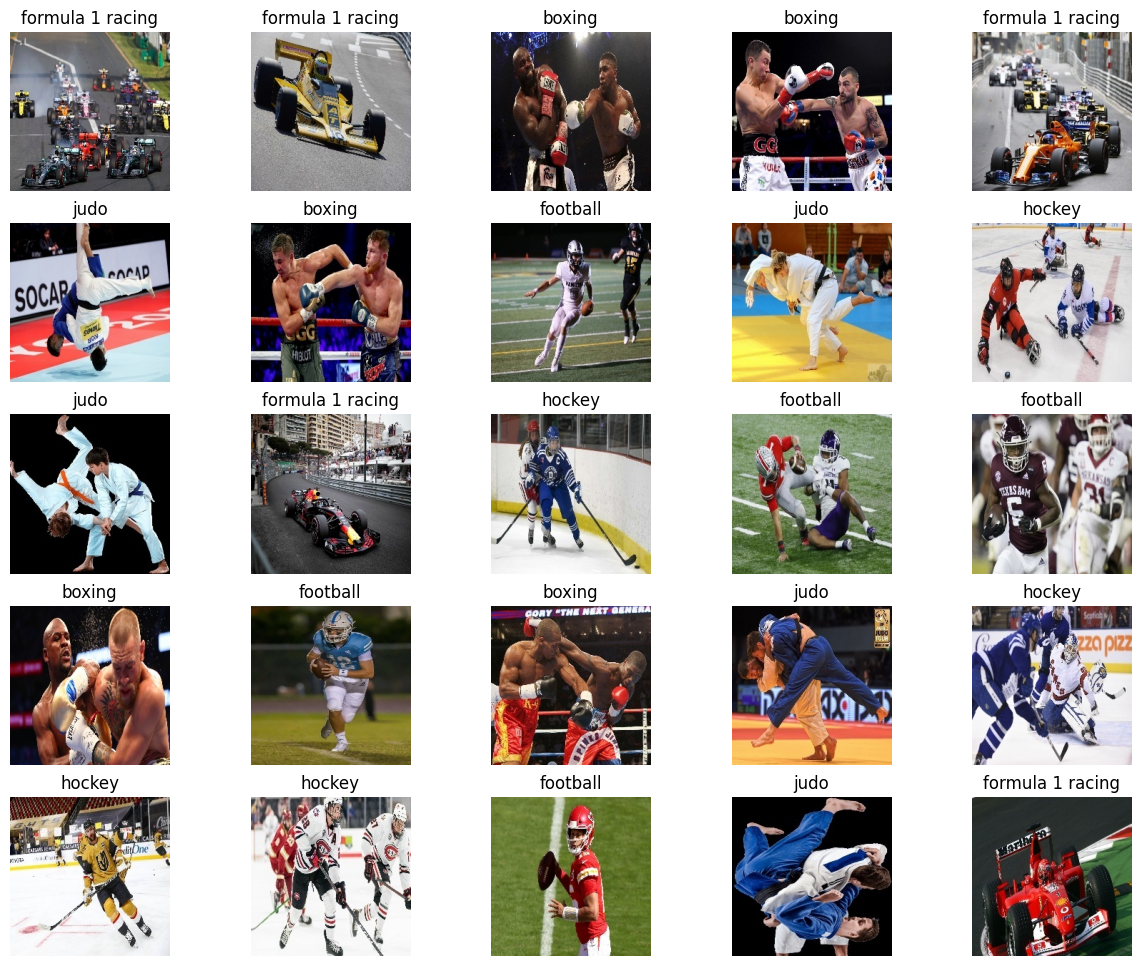

In [63]:
plt.figure(figsize=(15,12))
for i, row in valid_df.sample(n=25).reset_index().iterrows():
    plt.subplot(5,5,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [64]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision



BATCH_SIZE = 10
IMAGE_SIZE = (224, 224)


generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    # there could be image augmentation here
)

# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

valid_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 819 validated image filenames belonging to 5 classes.
Found 25 validated image filenames belonging to 5 classes.
Found 25 validated image filenames belonging to 5 classes.


In [65]:
pretrained_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False, # we don`t need a pre-trained top layer (output layer)
    weights='imagenet',
    pooling='max'
)

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

In [66]:
num_classes = len(set(train_images.classes))


# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
], name='AugmentationLayer')



inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = augment(inputs)
pretrain_out = pretrained_model(x, training = False)
x = layers.Dense(350)(pretrain_out)
x = layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x) # mixed_precision need separated Dense and Activation layers
model = Model(inputs=inputs, outputs=outputs)



model.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 dense_12 (Dense)            (None, 350)               448350    
                                                                 
 activation_1 (Activation)   (None, 350)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 350)               1400

In [69]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=valid_images,
    validation_steps=len(valid_images),
    epochs=50,
    callbacks=[
        EarlyStopping(monitor = "val_loss",
                               patience = 3,
                               restore_best_weights = True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('/content/drive/MyDrive/навчальне/data')

Epoch 1/50
82/82 [==============================] - 37s 446ms/step - loss: 0.1201 - accuracy: 0.9585 - val_loss: 0.0044 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 2/50
82/82 [==============================] - 36s 438ms/step - loss: 0.0989 - accuracy: 0.9646 - val_loss: 0.0329 - val_accuracy: 0.9600 - lr: 5.0000e-04
Epoch 3/50
82/82 [==============================] - 38s 460ms/step - loss: 0.0564 - accuracy: 0.9805 - val_loss: 0.0035 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 4/50
82/82 [==============================] - 37s 447ms/step - loss: 0.0627 - accuracy: 0.9780 - val_loss: 0.0764 - val_accuracy: 0.9600 - lr: 5.0000e-04
Epoch 5/50
82/82 [==============================] - 37s 450ms/step - loss: 0.0392 - accuracy: 0.9890 - val_loss: 0.0138 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 6/50
82/82 [==============================] - 38s 460ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0066 - val_accuracy: 1.0000 - lr: 1.0000e-04


In [70]:
results = model.evaluate(test_images, verbose=0)

print("Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.2f}%".format(results[1] * 100))

Loss: 0.00124
Accuracy: 100.00%


TEXT

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

In [83]:
df_text = pd.read_csv("/content/drive/MyDrive/навчальне/data/lab3.2/bible_data_set.csv")

df_text

,citation,book,chapter,verse,text
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ..."
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness..."
...,...,...,...,...,...
31097,Revelation 22:17,Revelation,22,17,"And the Spirit and the bride say, Come. And le..."
31098,Revelation 22:18,Revelation,22,18,For I testify unto every man that heareth the ...
31099,Revelation 22:19,Revelation,22,19,And if any man shall take away from the words ...
31100,Revelation 22:20,Revelation,22,20,"He which testifieth these things saith, Surely..."


In [84]:
df_text = df_text[['book', 'text']]

df_text

,book,text
0,Genesis,In the beginning God created the heaven and th...
1,Genesis,"And the earth was without form, and void; and ..."
2,Genesis,"And God said, Let there be light: and there wa..."
3,Genesis,"And God saw the light, that it was good: and G..."
4,Genesis,"And God called the light Day, and the darkness..."
...,...,...
31097,Revelation,"And the Spirit and the bride say, Come. And le..."
31098,Revelation,For I testify unto every man that heareth the ...
31099,Revelation,And if any man shall take away from the words ...
31100,Revelation,"He which testifieth these things saith, Surely..."


In [89]:
X_text3 = df_text['text']
Y_text3 = df_text['book']


from sklearn.model_selection import train_test_split
X_text3_train, X_text3_test, Y_text3_train, Y_text3_test = train_test_split(X_text3, Y_text3,  test_size=0.20)

In [96]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_text3_train)
X_text3_train_seq = tokenizer.texts_to_sequences(X_text3_train)
X_text3_test_seq = tokenizer.texts_to_sequences(X_text3_test)

In [97]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Padding
max_sequence_length = 100
X_train_pad = pad_sequences(X_text3_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_text3_test_seq, maxlen=max_sequence_length)

In [98]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

model3 = keras.Sequential()
model3.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model3.add(LSTM(100))
model3.add(Dense(3, activation='sigmoid'))
model3.add(Dense(3, activation='softmax'))  # 3 output classes

In [99]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense_14 (Dense)            (None, 3)                 303       
                                                                 
 dense_15 (Dense)            (None, 3)                 12        
                                                                 
Total params: 1371915 (5.23 MB)
Trainable params: 1371915 (5.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
epochs = 10
batch_size = 64
history = model3.fit(X_train_pad, Y_text3_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10


UnimplementedError: ignored

In [109]:
loss, accuracy = model3.evaluate(X_test_pad, Y_text3_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

UnimplementedError: ignored